In [2]:
# import
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Read API
API_KEY = ''

with open('ALPHAVANTAGE_API_KEY') as f:
    API_KEY = f.read()

In [4]:
ts = TimeSeries(API_KEY, output_format='pandas', indexing_type='integer') 
ti = TechIndicators(key=API_KEY, output_format='pandas')

In [5]:
df, dm = ts.get_daily('COST', outputsize='full')

In [6]:
df.shape

(6244, 6)

In [7]:
df['dateTime'] = pd.to_datetime(df['index'])
df['day'] = df['dateTime'].dt.day_of_week
df['quarter'] = df['dateTime'].dt.quarter
df['month'] = df['dateTime'].dt.month
df['year'] = df['dateTime'].dt.year
df['dayofyear'] = df['dateTime'].dt.dayofyear
df['dayofmonth'] = df['dateTime'].dt.day
df['weekofyear'] = df['dateTime'].dt.isocalendar().week

In [32]:
df['weekofyear']

index
0       34
1       34
2       34
3       34
4       34
        ..
6238    44
6239    44
6240    44
6241    44
6242    44
Name: weekofyear, Length: 6243, dtype: UInt32

In [8]:
df['PnL'] = (df['4. close']-df['1. open'])*100/ df['1. open']

In [9]:
# Function to calculate sample mean distribution
def sample_mean_distribution(population, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means


In [10]:
sample_size = 30
num_samples = 100000

In [11]:
# Calculate sample mean distribution
sample_means = sample_mean_distribution(df[df['day'] == 0]['PnL'][0:800], sample_size, num_samples)

In [12]:
# Calculate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)

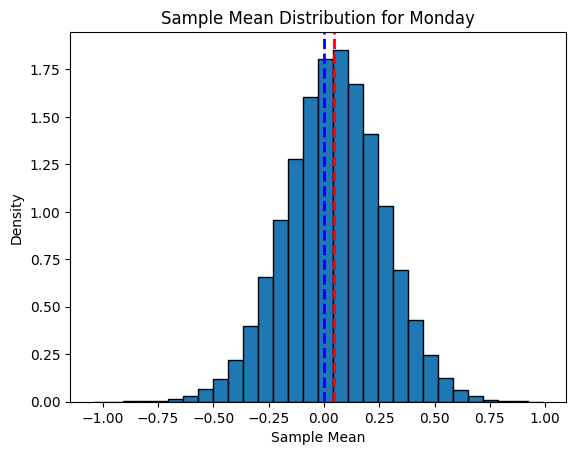

In [13]:

# Add vertical lines at the mean of sample means and at 0
plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')

plt.hist(sample_means, bins=30, edgecolor='black', density=True)
plt.title('Sample Mean Distribution for Monday')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

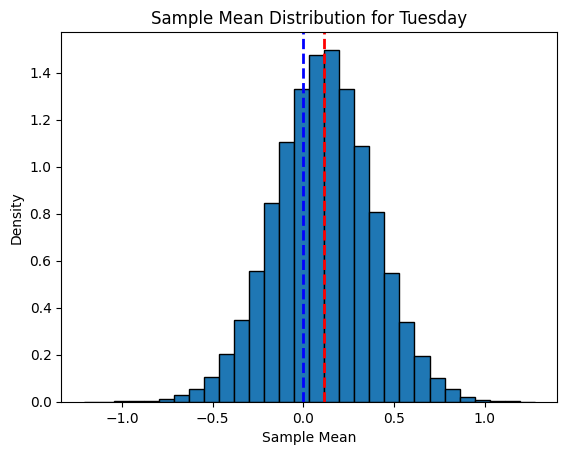

In [14]:
# Calculate sample mean distribution
sample_means = sample_mean_distribution(df[df['day'] == 1]['PnL'], sample_size, num_samples)
# Calculate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)

# Add vertical lines at the mean of sample means and at 0
plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')

plt.hist(sample_means, bins=30, edgecolor='black', density=True)
plt.title('Sample Mean Distribution for Tuesday')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

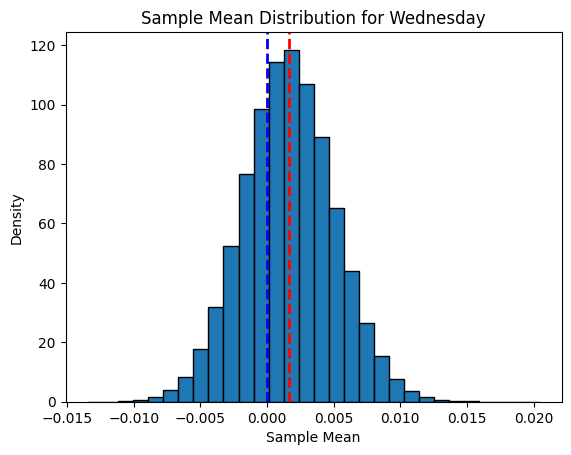

In [68]:
# Calculate sample mean distribution
sample_means = sample_mean_distribution(df[df['day'] == 2]['PnL'], sample_size, num_samples)
# Calculate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)

# Add vertical lines at the mean of sample means and at 0
plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')

plt.hist(sample_means, bins=30, edgecolor='black', density=True)
plt.title('Sample Mean Distribution for Wednesday')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

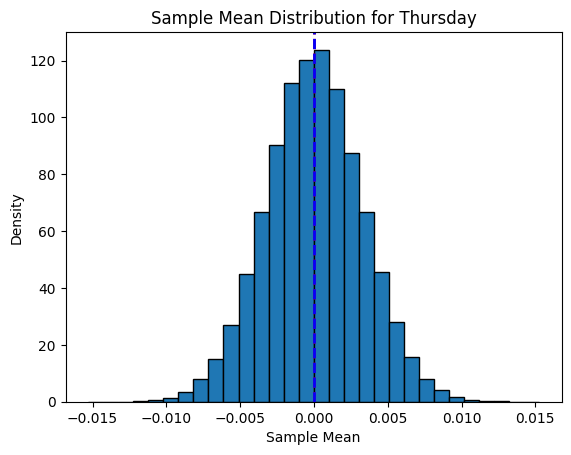

In [69]:
# Calculate sample mean distribution
sample_means = sample_mean_distribution(df[df['day'] == 3]['PnL'], sample_size, num_samples)
# Calculate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)

# Add vertical lines at the mean of sample means and at 0
plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')

plt.hist(sample_means, bins=30, edgecolor='black', density=True)
plt.title('Sample Mean Distribution for Thursday')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

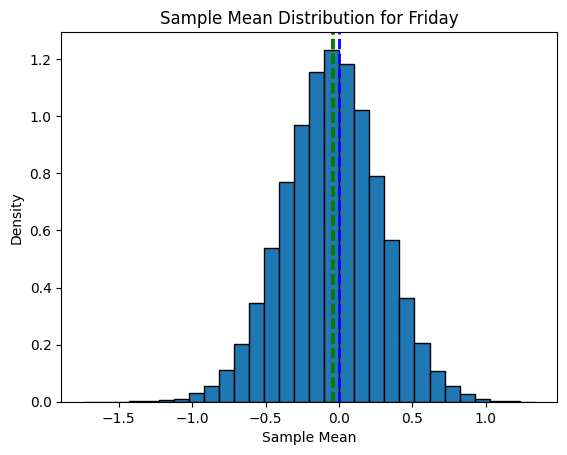

In [89]:
# Calculate sample mean distribution
sample_means = sample_mean_distribution(df[df['day'] == 4]['PnL'], sample_size, num_samples)
# Calculate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)
# Calculate the mean and standard deviation of the sample means
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

# Calculate the 95% confidence interval for the mean
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (std_of_sample_means / np.sqrt(num_samples))
confidence_interval = (mean_of_sample_means - margin_of_error, mean_of_sample_means + margin_of_error)

# Add vertical lines at the mean of sample means and at 0
plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')

# Add confidence interval lines
plt.axvline(confidence_interval[0], color='green', linestyle='--', linewidth=2, label=f'Lower CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', linewidth=2, label=f'Upper CI: {confidence_interval[1]:.2f}')


plt.hist(sample_means, bins=30, edgecolor='black', density=True)
plt.title('Sample Mean Distribution for Friday')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

Based on above analysis of META: 
- Best day is : Wednesday > Monday
- Worst Day: Friday, Thursday

In [15]:
def analyze(day):
    # Calculate sample mean distribution
    sample_means = sample_mean_distribution(df[df['day'] == day]['PnL'], sample_size, num_samples)
    # Calculate the mean of the sample means
    mean_of_sample_means = np.mean(sample_means)
    # Calculate the mean and standard deviation of the sample means
    mean_of_sample_means = np.mean(sample_means)
    std_of_sample_means = np.std(sample_means)
    
    # Calculate the 95% confidence interval for the mean
    confidence_level = 0.95
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (std_of_sample_means / np.sqrt(num_samples))
    confidence_interval = (mean_of_sample_means - margin_of_error, mean_of_sample_means + margin_of_error)
    
    # Add vertical lines at the mean of sample means and at 0
    plt.axvline(mean_of_sample_means, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
    plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='0')
    
    # Add confidence interval lines
    plt.axvline(confidence_interval[0], color='green', linestyle='--', linewidth=2, label=f'Lower CI: {confidence_interval[0]:.2f}')
    plt.axvline(confidence_interval[1], color='green', linestyle='--', linewidth=2, label=f'Upper CI: {confidence_interval[1]:.2f}')
    
    
    plt.hist(sample_means, bins=30, edgecolor='black', density=True)
    plt.title('Sample Mean Distribution for Friday')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.show()
    return confidence_interval

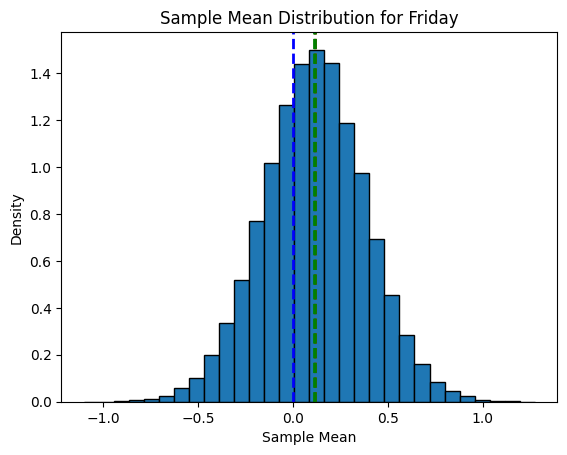

(-0.13576976325996443, -0.359978194926966)

In [17]:
tomorrow=1
confidence_interval = analyze(tomorrow)
(confidence_interval[0] - df[df['day'] == tomorrow]['PnL'][0:50].mean()), (confidence_interval[1] - df[df['day'] == tomorrow]['PnL'][0:20].mean())

### Lets try XGBoost for time series forcasting

In [16]:
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [17]:
features = ['day', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'PnL']

In [40]:
data = df.loc[:, features]
data.head()

,day,quarter,month,year,dayofyear,dayofmonth,weekofyear,PnL
index,,,,,,,,
0,4,3,8,2024,236,23,34,-0.371676
1,3,3,8,2024,235,22,34,-0.537232
2,2,3,8,2024,234,21,34,0.077208
3,1,3,8,2024,233,20,34,0.481651
4,0,3,8,2024,232,19,34,0.202162


In [41]:
test = data[0:300]
train = data[300::]

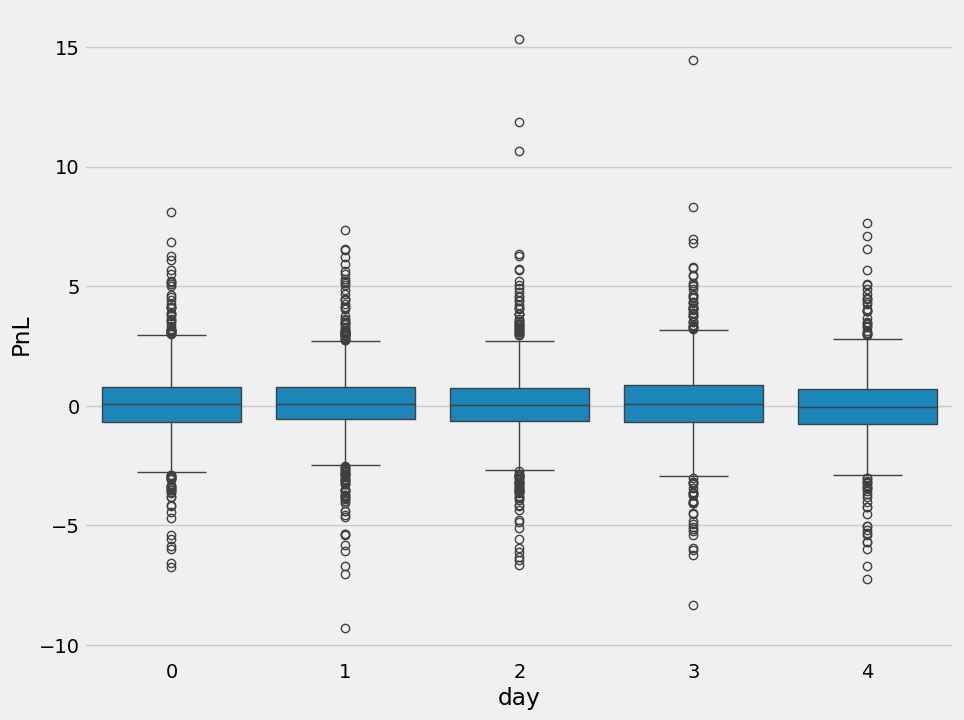

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='day', y='PnL')
# ax.set_title('PnL by Day')
plt.show()

In [43]:
FEATURES = ['day', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = ['PnL']

In [44]:
data

,day,quarter,month,year,dayofyear,dayofmonth,weekofyear,PnL
index,,,,,,,,
0,4,3,8,2024,236,23,34,-0.371676
1,3,3,8,2024,235,22,34,-0.537232
2,2,3,8,2024,234,21,34,0.077208
3,1,3,8,2024,233,20,34,0.481651
4,0,3,8,2024,232,19,34,0.202162
...,...,...,...,...,...,...,...,...
6238,4,4,11,1999,309,5,44,3.951368
6239,3,4,11,1999,308,4,44,-1.429264
6240,2,4,11,1999,307,3,44,0.457129


In [45]:
X_train = train.loc[:, FEATURES]
y_train = train.loc[:, TARGET]

X_test = test.loc[:, FEATURES]
y_test = test.loc[:, TARGET]

In [46]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:1.58207	validation_1-rmse:1.06956
[100]	validation_0-rmse:1.49484	validation_1-rmse:1.00535


/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [06:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:1.45983	validation_1-rmse:0.99775
[239]	validation_0-rmse:1.44869	validation_1-rmse:0.99777


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

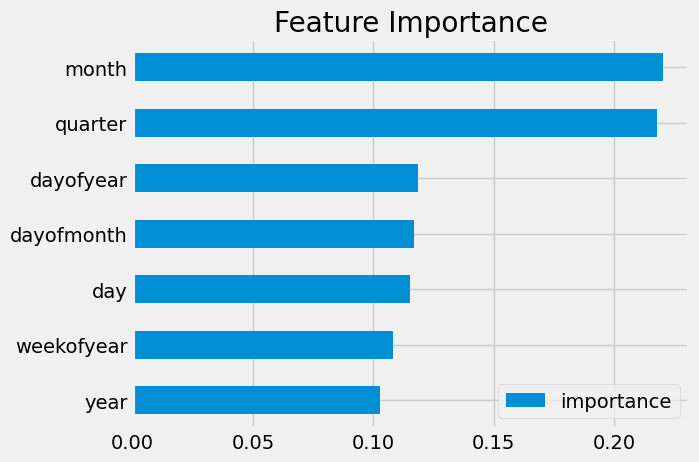

In [47]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [48]:
def getTestData(date):
    # ['day', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
    # Convert the input date string to a datetime object
    sr = pd.Series([date])
    sr = pd.to_datetime(sr) 
    return pd.DataFrame([[sr.dt.day_of_week[0], sr.dt.quarter[0], sr.dt.month[0], sr.dt.year[0], sr.dt.dayofyear[0], sr.dt.day[0], sr.dt.isocalendar().week[0]]], columns=FEATURES)

In [49]:
reg.predict(getTestData('08-25-2024'))

array([0.22579888], dtype=float32)

In [11]:
# lets see if tommorow is positive or negative
tomorrow=0
(confidence_interval[0] - df[df['day'] == tomorrow]['PnL'][0:50].mean()), (confidence_interval[1] - df[df['day'] == tomorrow]['PnL'][0:20].mean())

NameError: name 'confidence_interval' is not defined

In [95]:
confidence_interval

(-0.04709278884478352, -0.04303977705394302)

In [54]:
df['PnL'] = np.where((df['4. close']-df['1. open'])<0, -1, 1)
df['PnL']

index
0    -1
1    -1
2     1
3    -1
4    -1
     ..
95    1
96   -1
97   -1
98    1
99    1
Name: PnL, Length: 100, dtype: int64

In [49]:
# https://medium.com/@smitpate08/unleashing-the-power-of-categorical-relationships-with-pandas-in-python-82fbe3917338
# based on this doc, relationship testing
from scipy.stats import chi2_contingency

def check_relationship(data, alpha = 0.05):
    # Get all categorical columns in the DataFrame
    categorical_columns = data.columns
    results = []
    
    # Create a copy of the dataframe to avoid modifying the original
    data_copy = data.copy()
    
    # Remove rows containing missing values
    data_copy = data_copy.dropna(subset=categorical_columns)
    
    # Iterate over each pair of categorical columns
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            col1 = categorical_columns[i]
            col2 = categorical_columns[j]
            
            # Create the contingency table for the two columns
            contingency_table = pd.crosstab(data_copy[col1], data_copy[col2])
            
            # Calculate the chi-squared test of independence
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Check if we reject the null hypothesis (i.e., if the columns are dependent)
            reject_null_hypothesis = p < alpha
            dependency = reject_null_hypothesis
            
            # Add the results to the list of results
            results.append({'column': col1, 'column_compared_with': col2, 'p-value': p, 'Null hypothesis rejected': reject_null_hypothesis, 'dependency': dependency})
    return pd.DataFrame(results).sort_values(by='p-value', ascending=False)

In [55]:
check_relationship(df[['day', 'PnL']])

,column,column_compared_with,p-value,Null hypothesis rejected,dependency
0,day,PnL,0.438971,False,False


In [61]:
df, dm = ts.get_weekly('META')

In [62]:
df['day'] = pd.to_datetime(df['index']).dt.weekofyear
df['PnL'] = np.where((df['4. close']-df['1. open'])<0, -1, 1)

/var/folders/ql/t_pwhj2x01x9pf367dwbv_5c0000gn/T/ipykernel_12478/3216668950.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['day'] = pd.to_datetime(df['index']).dt.weekofyear


In [63]:
check_relationship(df[['day', 'PnL']])

,column,column_compared_with,p-value,Null hypothesis rejected,dependency
0,day,PnL,0.766047,False,False


In [2]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:ce5c135bf98da783bf5964e89aab587e3341c8adc379f36ace17ae7881f53e8c
######################################################################### 100.0%                                                     1.8%                                                       28.3%##########                                  56.8%#############                                 57.8%#####################################           89.0%
==> Pouring portable-ruby-3.3.4_1.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
aider                      graphviz2drawio            packetry
asak                       h26forge                   passt
asm6809                    